

```

    Generate artificial classification data.


```



In [54]:
number_of_samples_per_class = 15
number_of_relevant_features = 30  # TODO assert complete number of features?

number_of_pseudo_class_features = 10
number_of_random_features = 200

In [55]:
import artificial_data_generator_tools
import numpy as np

In [56]:
number_of_features_correlated_cluster1 = 5
correlated_cluster_1 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster1,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.6,
)

generation of correlation matrix ...
generation of covariant matrix ...


min absolute correlation: 0.5571428571428572


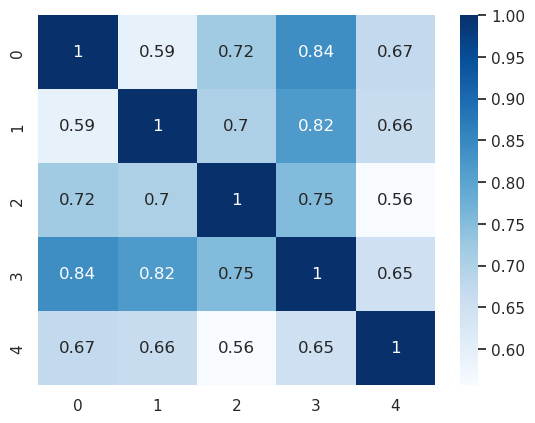

In [57]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_1)

In [58]:
number_of_features_correlated_cluster2 = 10
correlated_cluster_2 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster2,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)

generation of correlation matrix ...
generation of covariant matrix ...


/home/sigrun/miniconda3/envs/cv_pruner_dev2/lib/python3.11/site-packages/statsmodels/stats/correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


min absolute correlation: 0.8535714285714285


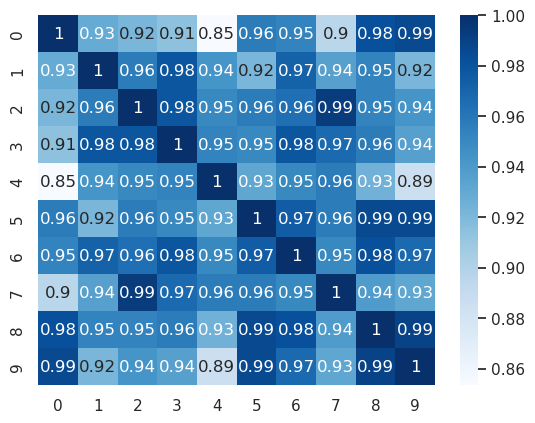

In [59]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_2)

Generate complete class 1

In [60]:
class_components_list = [
    correlated_cluster_1,
    correlated_cluster_2,
]
number_of_unclustered_relevant_features = number_of_relevant_features - (
    number_of_features_correlated_cluster1 + number_of_features_correlated_cluster2
)
if number_of_unclustered_relevant_features > 0:
    unclustered_relevant_features = (
        artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
            number_of_samples=number_of_samples_per_class,
            number_of_normal_distributed_relevant_features=number_of_unclustered_relevant_features,
            scale=1,
        )
    )
    class_components_list.append(unclustered_relevant_features)

In [61]:
class1_np = artificial_data_generator_tools.build_class(
    class_features_list=class_components_list,
)

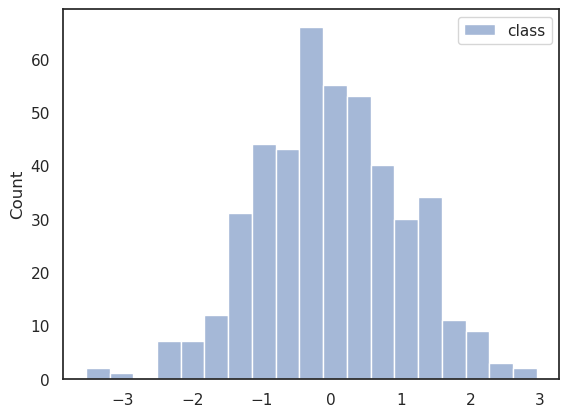

In [62]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_np)

In [63]:
log_normal_distributed_class1_np = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_np=class1_np
    )
)
assert log_normal_distributed_class1_np.shape[1] == number_of_relevant_features

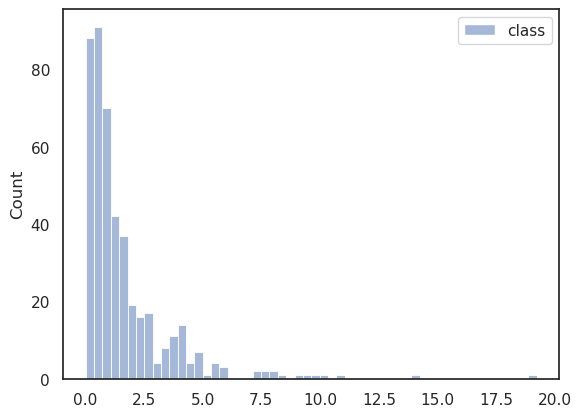

In [64]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_np,
)

Generate class 2

In [65]:
class2_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_relevant_features,
    scale=1,
)
label_class_2 = 1
class2_np = artificial_data_generator_tools.build_class(class_features_list=[class2_np])

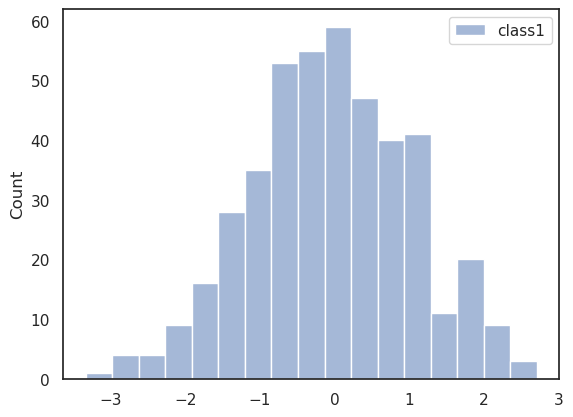

In [66]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_np, label_class_2)

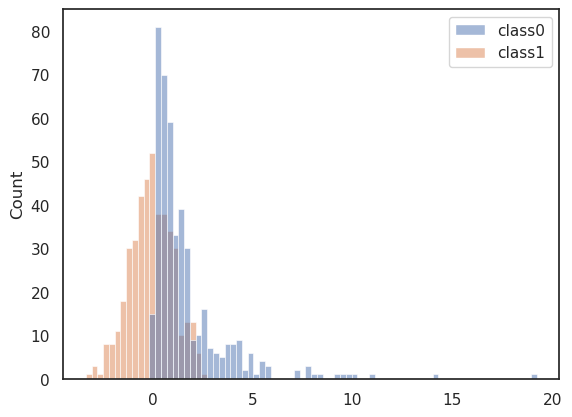

In [67]:
artificial_data_generator_tools.plot_distributions_of_all_classes([log_normal_distributed_class1_np, class2_np])

In [68]:
shifted_class1_np = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_np, effect_size=2
)

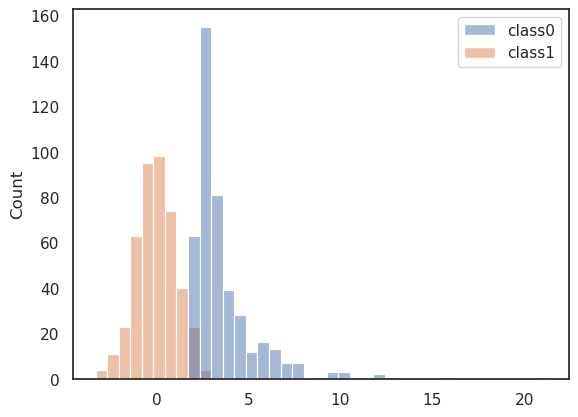

In [69]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_np, class2_np])

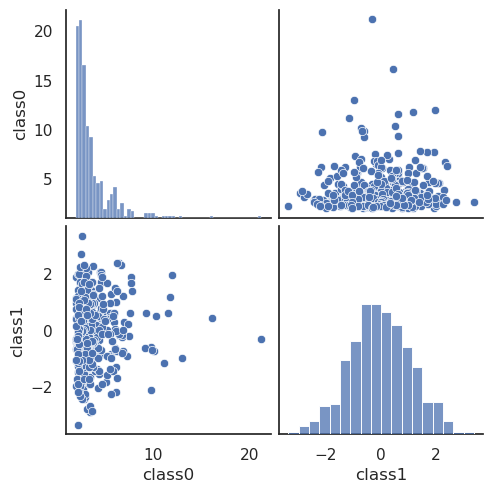

In [70]:
artificial_data_generator_tools.plot_correlation_between_classes([shifted_class1_np, class2_np])

In [71]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_np, class2_np],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
print(artificial_data_df.shape)
print(artificial_data_df.head())

(30, 241)
   label      bm_0      bm_1      bm_2      bm_3      bm_4      bm_5  \
0    0.0  5.655214  3.453083  2.870259  3.202619  5.655014  2.355082   
1    0.0  2.332579  6.523774  2.899191  2.746296  3.219438  2.759930   
2    0.0  2.055170  2.106008  2.092974  2.115433  2.029178  7.622227   
3    0.0  2.499551  2.286099  2.460907  2.373662  2.301480  3.207607   
4    0.0  2.330157  2.940981  2.678571  2.206934  4.487040  2.377047   

       bm_6      bm_7      bm_8  ...    rf_190    rf_191    rf_192    rf_193  \
0  2.343893  2.473175  2.367942  ...  0.926834  0.875892  0.612741  0.903599   
1  3.303706  2.842743  3.188336  ...  0.878518  0.391930  0.953427  0.698240   
2  6.859795  6.076000  6.262515  ...  0.574536  0.746953  0.674587  0.183615   
3  3.790640  3.508256  3.758871  ...  0.449203  0.640775  0.047203  0.527116   
4  2.539324  2.375320  2.414113  ...  0.768127  0.379789  0.746339  0.522536   

     rf_194    rf_195    rf_196    rf_197    rf_198    rf_199  
0  0.122078 